## Data Preprocessing

## 1.data cleaning
 ### handle missing values
 ### handle duplicates
 ### Fix inconsistent or incorrect data
 
## 2.data transformation
 ### Encoding categorical data
  #### Convert text labels into numbers
  #### Techniques: One-Hot Encoding, Label Encoding
 ### Feature scaling
 ### Feature extraction or transformation
## 3.Feature Engineering
 #### lag features
 #### rolling or moving features
 #### combaine features
 #### encode date/time extract date
## 4.Feature Selection / Dimensionality Reduction
## 5.Train-Test Split

In [98]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

#### Loading and inspecting data

In [404]:
DF = pd.read_csv("MITVOL.csv")
DF


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [406]:
DF.shape

(48204, 9)

In [408]:
DF.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [410]:
DF.info

<bound method DataFrame.info of       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0         NaN  288.28      0.0      0.0          40        Clouds   
1         NaN  289.36      0.0      0.0          75        Clouds   
2         NaN  289.58      0.0      0.0          90        Clouds   
3         NaN  290.13      0.0      0.0          90        Clouds   
4         NaN  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1

#### Checking for missing values

In [413]:
missing_values = DF.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


#### Checking and removing duplicates if any

In [416]:
DF.duplicated().sum()

17

In [418]:
# remove duplicates
DF = DF.drop_duplicates()

# checking again
DF.duplicated().sum()

0

In [420]:
DF.isnull().sum()


holiday                48126
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [422]:
DF.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000
mean,281.204995,0.334382,0.000222,49.365451,3259.618134
std,13.338738,44.797033,0.008169,39.015213,1986.954465
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1192.500000
50%,282.450000,0.000000,0.000000,64.000000,3379.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [424]:
DF['rain_flag'] = (DF['rain_1h'] > 0).astype(int)
DF['snow_flag'] = (DF['snow_1h'] > 0).astype(int)


C:\Users\ktomj\AppData\Local\Temp\ipykernel_9928\2933044049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['rain_flag'] = (DF['rain_1h'] > 0).astype(int)
C:\Users\ktomj\AppData\Local\Temp\ipykernel_9928\2933044049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['snow_flag'] = (DF['snow_1h'] > 0).astype(int)


In [428]:
# holiday has all NaN values so droping that column since that doesnt provide any information
DF.drop(columns=['holiday', 'rain_1h'], inplace=True)
DF

KeyError: "['holiday'] not found in axis"

In [434]:
DF.drop(columns=['snow_1h'], inplace=True)
DF

C:\Users\ktomj\AppData\Local\Temp\ipykernel_9928\483135449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.drop(columns=['snow_1h'], inplace=True)


,temp,clouds_all,weather_main,weather_description,date_time,traffic_volume,rain_flag,snow_flag
0,288.28,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0,0
1,289.36,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0,0
2,289.58,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0,0
3,290.13,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0,0
4,291.14,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0,0
...,...,...,...,...,...,...,...,...
48199,283.45,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,0,0
48200,282.76,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,0,0
48201,282.73,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,0,0
48202,282.09,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,0,0


In [442]:
DF.describe()

,temp,clouds_all,traffic_volume,rain_flag,snow_flag
count,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000
mean,281.204995,49.365451,3259.618134,0.071949,0.001307
std,13.338738,39.015213,1986.954465,0.258406,0.036135
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,1.000000,1192.500000,0.000000,0.000000
50%,282.450000,64.000000,3379.000000,0.000000,0.000000
75%,291.806000,90.000000,4933.000000,0.000000,0.000000
max,310.070000,100.000000,7280.000000,1.000000,1.000000


In [436]:
DF.skew(numeric_only=True)


temp              -2.247480
clouds_all        -0.197386
traffic_volume    -0.089061
rain_flag          3.313151
snow_flag         27.602930
dtype: float64

In [444]:
DF['snow_flag'].value_counts(normalize=True)


snow_flag
0    0.998693
1    0.001307
Name: proportion, dtype: float64

*** since 99.87 percentage of this value is zero just negglecting this column

In [448]:
DF = DF.drop(columns=['snow_flag'], errors='ignore')


In [450]:
DF.shape

(48187, 7)

### Step 2: Convert date_time to datetime type

In [453]:
DF['date_time'] = pd.to_datetime(DF['date_time'])

# splitting date_time into components
DF['day_name'] = DF['date_time'].dt.day_name()
#DF['month'] = DF['date_time'].dt.month_name()
DF['month'] = DF['date_time'].dt.month
DF['day'] = DF['date_time'].dt.day
DF['year'] = DF['date_time'].dt.year
DF['time'] = DF['date_time'].dt.time
# DF['day'] = DF['date_time'].dt.day
#DF.drop(columns=['date_time'], inplace=True)
DF['temp'] = DF['temp'] - 273.15
DF


,temp,clouds_all,weather_main,weather_description,date_time,traffic_volume,rain_flag,day_name,month,day,year,time
0,15.13,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0,Tuesday,10,2,2012,09:00:00
1,16.21,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0,Tuesday,10,2,2012,10:00:00
2,16.43,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0,Tuesday,10,2,2012,11:00:00
3,16.98,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0,Tuesday,10,2,2012,12:00:00
4,17.99,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0,Tuesday,10,2,2012,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,0,Sunday,9,30,2018,19:00:00
48200,9.61,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,0,Sunday,9,30,2018,20:00:00
48201,9.58,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,0,Sunday,9,30,2018,21:00:00
48202,8.94,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,0,Sunday,9,30,2018,22:00:00


#### Hourly change in traffic

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime is in proper format
DF['date_time'] = pd.to_datetime(DF['date_time'])

# Extract hour, weekday, and month if not already present
DF['hour'] = DF['date_time'].dt.hour
DF['day_name'] = DF['date_time'].dt.day_name()
DF['month'] = DF['date_time'].dt.month



### -------------------------------
### 1️. Hourly Variation
### -------------------------------

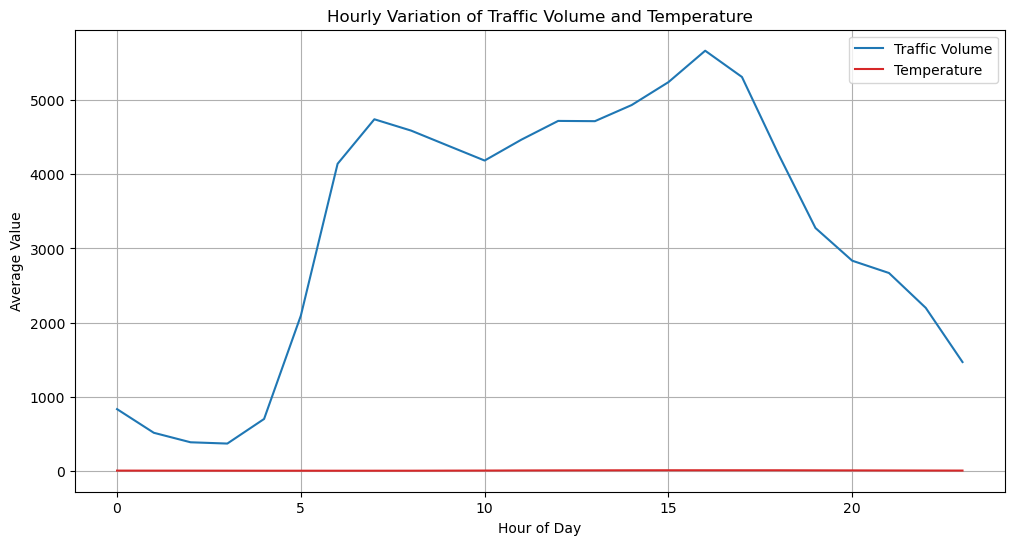

In [459]:

hourly_data = DF.groupby('hour')[['traffic_volume', 'temp']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data, x='hour', y='traffic_volume', label='Traffic Volume', color='tab:blue')
sns.lineplot(data=hourly_data, x='hour', y='temp', label='Temperature', color='tab:red')

plt.title('Hourly Variation of Traffic Volume and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

### -------------------------------
### 2. Weekday Variation
### -------------------------------



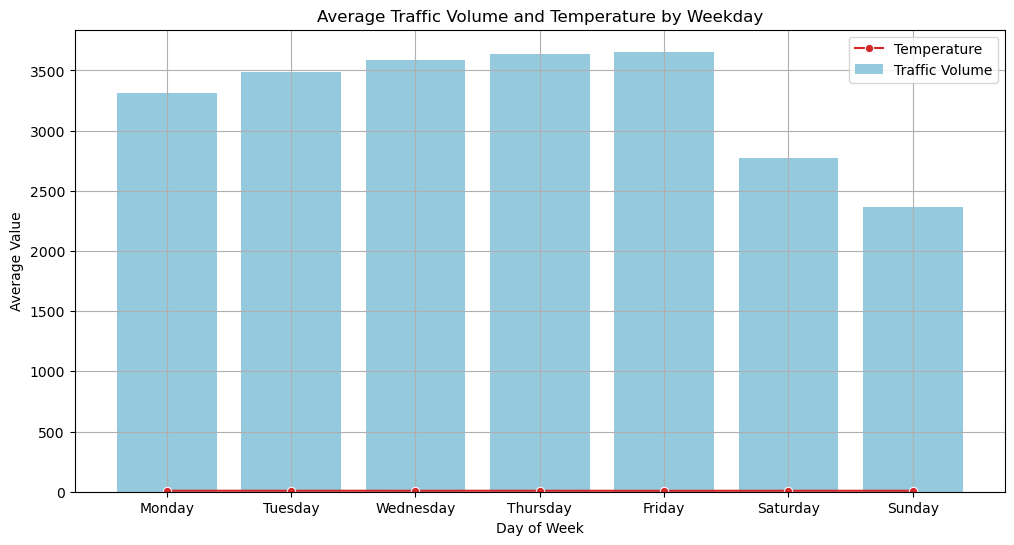

In [462]:
weekday_data = DF.groupby('day_name')[['traffic_volume', 'temp']].mean().reset_index()

# To keep weekday order correct:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data['day_name'] = pd.Categorical(weekday_data['day_name'], categories=day_order, ordered=True)
weekday_data = weekday_data.sort_values('day_name')

plt.figure(figsize=(12,6))
sns.barplot(data=weekday_data, x='day_name', y='traffic_volume', color='skyblue', label='Traffic Volume')
sns.lineplot(data=weekday_data, x='day_name', y='temp', color='tab:red', label='Temperature', marker='o')

plt.title('Average Traffic Volume and Temperature by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


### -------------------------------
### 3. Month-Based Variation
### -------------------------------

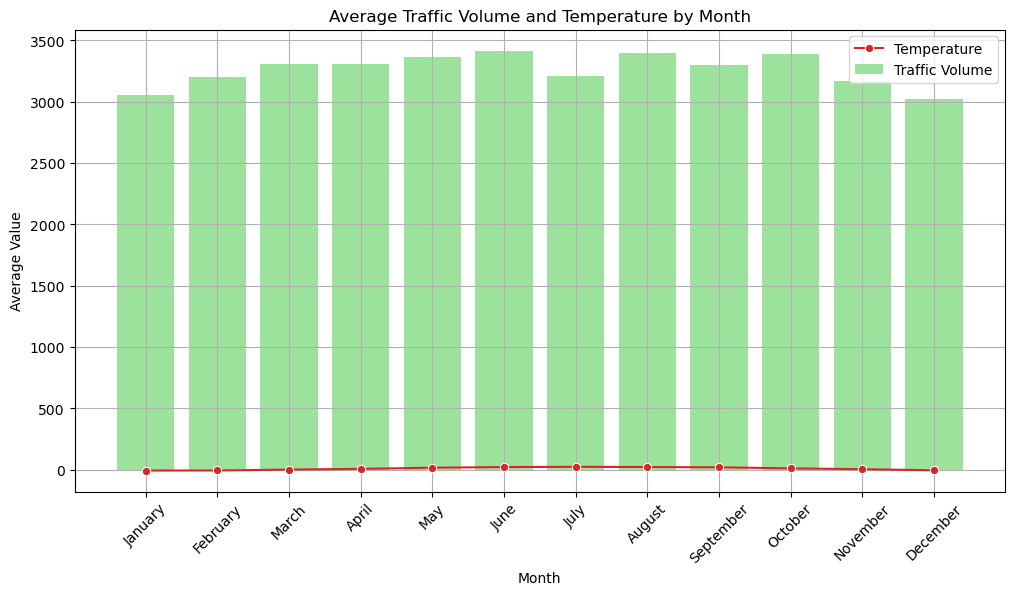

In [465]:

month_data = DF.groupby('month')[['traffic_volume', 'temp']].mean().reset_index()

# Optional: month names
import calendar
month_data['month_name'] = month_data['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(12,6))
sns.barplot(data=month_data, x='month_name', y='traffic_volume', color='lightgreen', label='Traffic Volume')
sns.lineplot(data=month_data, x='month_name', y='temp', color='tab:red', label='Temperature', marker='o')

plt.title('Average Traffic Volume and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Handle Categorical Features (One-Hot Encoding)

In [468]:
#  Convert categorical variables into numeric using One-Hot Encoding
categorical_columns = ['weather_main', 'weather_description', 'day_name']
DF1 = pd.get_dummies(DF, columns=categorical_columns, drop_first=True)
DF1

,temp,clouds_all,date_time,traffic_volume,rain_flag,month,day,year,time,hour,...,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,15.13,40,2012-10-02 09:00:00,5545,0,10,2,2012,09:00:00,9,...,False,False,False,False,False,False,False,False,True,False
1,16.21,75,2012-10-02 10:00:00,4516,0,10,2,2012,10:00:00,10,...,False,False,False,False,False,False,False,False,True,False
2,16.43,90,2012-10-02 11:00:00,4767,0,10,2,2012,11:00:00,11,...,False,False,False,False,False,False,False,False,True,False
3,16.98,90,2012-10-02 12:00:00,5026,0,10,2,2012,12:00:00,12,...,False,False,False,False,False,False,False,False,True,False
4,17.99,75,2012-10-02 13:00:00,4918,0,10,2,2012,13:00:00,13,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,75,2018-09-30 19:00:00,3543,0,9,30,2018,19:00:00,19,...,False,False,False,False,False,False,True,False,False,False
48200,9.61,90,2018-09-30 20:00:00,2781,0,9,30,2018,20:00:00,20,...,False,False,False,False,False,False,True,False,False,False
48201,9.58,90,2018-09-30 21:00:00,2159,0,9,30,2018,21:00:00,21,...,False,False,False,False,False,False,True,False,False,False
48202,8.94,90,2018-09-30 22:00:00,1450,0,9,30,2018,22:00:00,22,...,False,False,False,False,False,False,True,False,False,False


In [470]:
# Find unique values in the weather_main column
unique_weather = DF['weather_main'].unique()

# Print the unique values
print("Unique values in 'weather_main' column:")
print(unique_weather)
len(unique_weather)

Unique values in 'weather_main' column:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


11

In [472]:
unique_weather_description = DF['weather_description'].unique()

# Print the unique values
print("Unique values in 'weather_main' column:")
print(unique_weather_description)
print( 'Total =' ,len(unique_weather_description))


Unique values in 'weather_main' column:
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'light snow'
 'thunderstorm with drizzle' 'smoke' 'shower drizzle' 'light shower snow'
 'sleet']
Total = 38


#### since One hot encoding is increasing the size of the dataset i want to try with another method

## Label encoder

In [476]:
DF2 = DF.copy()


In [478]:
le_weather_main = LabelEncoder()

DF2['weather_main_encoded'] = le_weather_main.fit_transform(DF2['weather_main'])

#  Drop original column
DF2.drop(columns=['weather_main'], inplace=True)




In [480]:
#le_day_name = LabelEncoder()

#DF2['day_name_en'] = le_day_name.fit_transform(DF2['day_name'])

#  Drop original column
DF2.drop(columns=['day_name'], inplace=True)

In [482]:
def simplify_weather(desc):
    desc = desc.lower()
    if 'rain' in desc or 'drizzle' in desc:
        return 'Rain'
    elif 'snow' in desc or 'sleet' in desc:
        return 'Snow'
    elif 'cloud' in desc:
        return 'Clouds'
    elif 'clear' in desc:
        return 'Clear'
    elif 'fog' in desc or 'mist' in desc or 'haze' in desc or 'smoke' in desc:
        return 'Fog'
    elif 'thunder' in desc:
        return 'Thunderstorm'
    else:
        return 'Other'

DF2['weather_description_simplified'] = DF2['weather_description'].apply(simplify_weather)

le_desc = LabelEncoder()
DF2['weather_description_encoded'] = le_desc.fit_transform(DF2['weather_description_simplified'])

# Drop old columns
DF2.drop(columns=['weather_description', 'weather_description_simplified'], inplace=True)


In [484]:
# --- Extract hour from time
DF2['hour'] = DF2['time'].astype(str).str.split(':').str[0].astype(int)
DF2.drop(columns=['time'], inplace=True)

In [486]:
DF2.drop(columns=['date_time'], inplace=True)
DF2

,temp,clouds_all,traffic_volume,rain_flag,month,day,year,hour,weather_main_encoded,weather_description_encoded
0,15.13,40,5545,0,10,2,2012,9,1,1
1,16.21,75,4516,0,10,2,2012,10,1,1
2,16.43,90,4767,0,10,2,2012,11,1,1
3,16.98,90,5026,0,10,2,2012,12,1,1
4,17.99,75,4918,0,10,2,2012,13,1,1
...,...,...,...,...,...,...,...,...,...,...
48199,10.30,75,3543,0,9,30,2018,19,1,1
48200,9.61,90,2781,0,9,30,2018,20,1,1
48201,9.58,90,2159,0,9,30,2018,21,10,6
48202,8.94,90,1450,0,9,30,2018,22,1,1


### Step 4: Create Lag Features (for temporal dependencies)

In [489]:
# Assuming df is your DataFrame
DF2['lag_1'] = DF2['traffic_volume'].shift(1)
DF2['lag_2'] = DF2['traffic_volume'].shift(2)
DF2['lag_3'] = DF2['traffic_volume'].shift(3)
DF2

,temp,clouds_all,traffic_volume,rain_flag,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,15.13,40,5545,0,10,2,2012,9,1,1,NaN,NaN,NaN
1,16.21,75,4516,0,10,2,2012,10,1,1,5545.0,NaN,NaN
2,16.43,90,4767,0,10,2,2012,11,1,1,4516.0,5545.0,NaN
3,16.98,90,5026,0,10,2,2012,12,1,1,4767.0,4516.0,5545.0
4,17.99,75,4918,0,10,2,2012,13,1,1,5026.0,4767.0,4516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,75,3543,0,9,30,2018,19,1,1,3947.0,4132.0,4283.0
48200,9.61,90,2781,0,9,30,2018,20,1,1,3543.0,3947.0,4132.0
48201,9.58,90,2159,0,9,30,2018,21,10,6,2781.0,3543.0,3947.0
48202,8.94,90,1450,0,9,30,2018,22,1,1,2159.0,2781.0,3543.0


In [491]:
print(DF2.columns)
len(DF2.columns)

Index(['temp', 'clouds_all', 'traffic_volume', 'rain_flag', 'month', 'day',
       'year', 'hour', 'weather_main_encoded', 'weather_description_encoded',
       'lag_1', 'lag_2', 'lag_3'],
      dtype='object')


13

In [493]:
DF2.shape

(48187, 13)

In [495]:
DF2 = DF2.sort_values(by=['year', 'month', 'day', 'hour']).reset_index(drop=True)
DF2

,temp,clouds_all,traffic_volume,rain_flag,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,15.13,40,5545,0,10,2,2012,9,1,1,NaN,NaN,NaN
1,16.21,75,4516,0,10,2,2012,10,1,1,5545.0,NaN,NaN
2,16.43,90,4767,0,10,2,2012,11,1,1,4516.0,5545.0,NaN
3,16.98,90,5026,0,10,2,2012,12,1,1,4767.0,4516.0,5545.0
4,17.99,75,4918,0,10,2,2012,13,1,1,5026.0,4767.0,4516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,10.30,75,3543,0,9,30,2018,19,1,1,3947.0,4132.0,4283.0
48183,9.61,90,2781,0,9,30,2018,20,1,1,3543.0,3947.0,4132.0
48184,9.58,90,2159,0,9,30,2018,21,10,6,2781.0,3543.0,3947.0
48185,8.94,90,1450,0,9,30,2018,22,1,1,2159.0,2781.0,3543.0


In [497]:
# Drop irrelevant columns
#DF2 = DF2.drop(columns=['day_name'])
DF2

,temp,clouds_all,traffic_volume,rain_flag,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,15.13,40,5545,0,10,2,2012,9,1,1,NaN,NaN,NaN
1,16.21,75,4516,0,10,2,2012,10,1,1,5545.0,NaN,NaN
2,16.43,90,4767,0,10,2,2012,11,1,1,4516.0,5545.0,NaN
3,16.98,90,5026,0,10,2,2012,12,1,1,4767.0,4516.0,5545.0
4,17.99,75,4918,0,10,2,2012,13,1,1,5026.0,4767.0,4516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,10.30,75,3543,0,9,30,2018,19,1,1,3947.0,4132.0,4283.0
48183,9.61,90,2781,0,9,30,2018,20,1,1,3543.0,3947.0,4132.0
48184,9.58,90,2159,0,9,30,2018,21,10,6,2781.0,3543.0,3947.0
48185,8.94,90,1450,0,9,30,2018,22,1,1,2159.0,2781.0,3543.0


In [499]:
DF2.skew(numeric_only=True)


temp                          -2.247480
clouds_all                    -0.197386
traffic_volume                -0.089061
rain_flag                      3.313151
month                          0.013184
day                            0.006521
year                          -0.323123
hour                           0.029599
weather_main_encoded           0.874373
weather_description_encoded    0.859607
lag_1                         -0.089104
lag_2                         -0.089146
lag_3                         -0.089177
dtype: float64

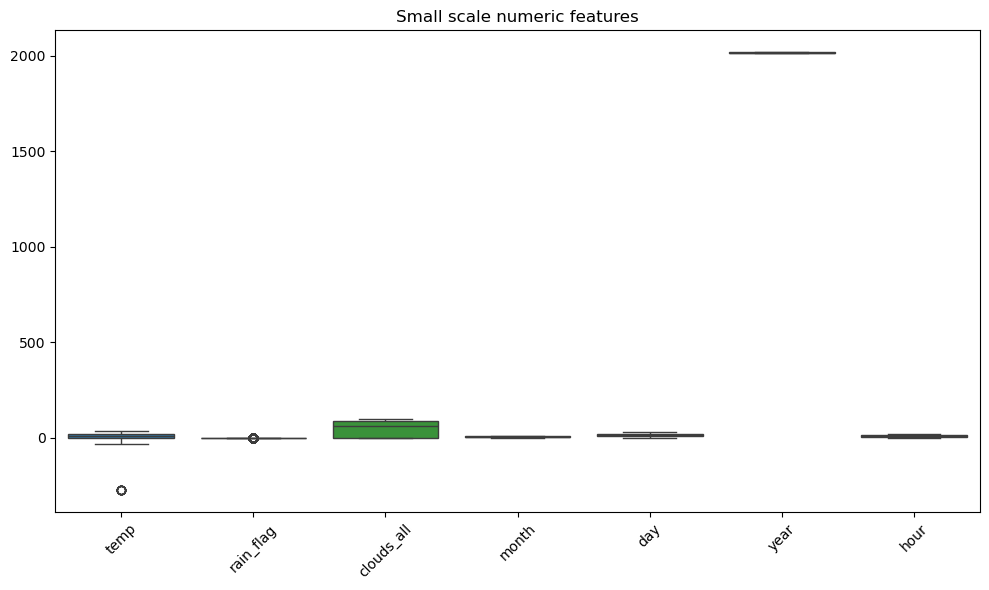

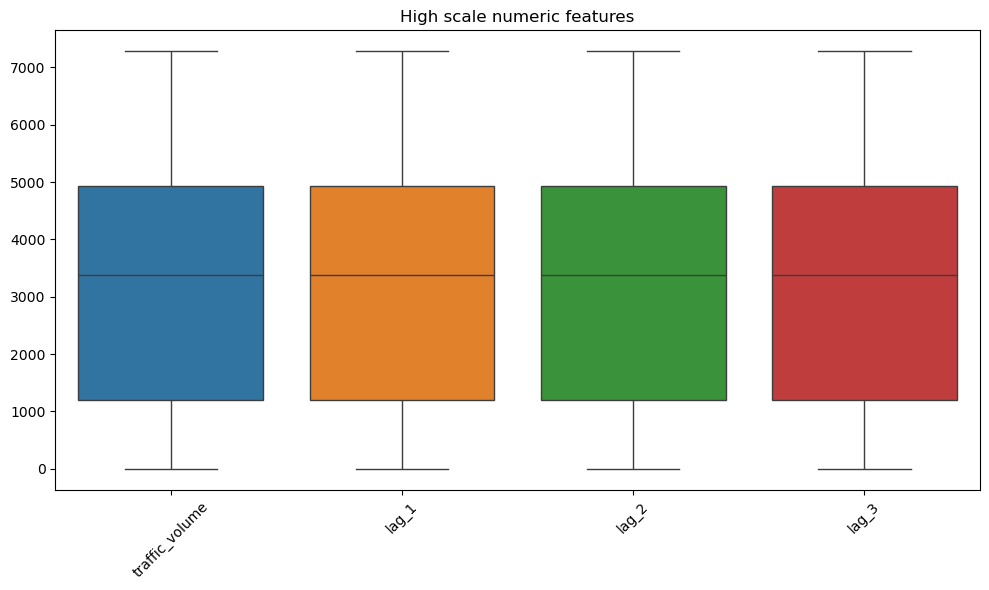

In [503]:
import matplotlib.pyplot as plt
import seaborn as sns

num_df = DF2.select_dtypes(include='number')

small = num_df[['temp','rain_flag','clouds_all','month','day','year','hour']]
big   = num_df[['traffic_volume','lag_1','lag_2','lag_3']]

plt.figure(figsize=(10,6))
sns.boxplot(data=small)
plt.title("Small scale numeric features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=big)
plt.title("High scale numeric features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [507]:
# First, let's check the current state
print("Rain_1h unique values:", DF2['rain_flag'].nunique())
print("Rain_1h value counts:\n", DF2['rain_flag'].value_counts().head())
#print("\nSnow_1h stats:\n", DF2['snow_1h'].describe())




Rain_1h unique values: 2
Rain_1h value counts:
 rain_flag
0    44720
1     3467
Name: count, dtype: int64


In [509]:
# Step 1: Save original data
DF2_backup = DF2.copy()

In [511]:
# ============================================
# Better approach: Handle rain and snow together
# ============================================

# Step 1: Save original data
DF2_backup = DF2.copy()

# Step 2: For RAIN - use percentile-based capping instead of IQR
rain_99th = DF2['rain_1h'].quantile(0.99)
print(f"\n99th percentile for rain: {rain_99th}")

DF2['rain_1h'] = DF2['rain_1h'].clip(upper=rain_99th)

# Step 3: For SNOW - same approach
snow_99th = DF2['snow_1h'].quantile(0.99)
print(f"99th percentile for snow: {snow_99th}")

DF2['snow_1h'] = DF2['snow_1h'].clip(upper=snow_99th)

# Step 4: Now apply log transformation
DF2['rain_1h_log'] = np.log1p(DF2['rain_1h'])
DF2['snow_1h_log'] = np.log1p(DF2['snow_1h'])

# Step 5: Check skewness again
print("\n=== After capping and log transform ===")
print(DF2[['rain_1h', 'snow_1h', 'rain_1h_log', 'snow_1h_log']].skew())

KeyError: 'rain_1h'

In [520]:
# ============================================
# CORRECT APPROACH: Binary + Intensity Features
# ============================================

# Remove the failed transformed columns first
#DF2 = DF2.drop(columns=['rain_1h_log', 'snow_1h_log'], errors='ignore')

# 1. Create binary indicators (0 = no rain/snow, 1 = has rain/snow)
#DF2['has_rain'] = (DF2['rain_1h'] > 0).astype(int)
#DF2['has_snow'] = (DF2['snow_1h'] > 0).astype(int)

# 2. For modeling, drop the original rain_1h and snow_1h
#DF2 = DF2.drop(columns=['rain_1h', 'snow_1h'])

# 3. Check skewness now
#print("\n=== After Binary Transformation ===")
#print(DF2.skew(numeric_only=True))

# 4. The binary features won't have skewness issues
#print("\nBinary feature distributions:")
#print(DF2['has_rain'].value_counts())
#print(DF2['has_snow'].value_counts())

In [522]:
# ============================================
# STEP 1: Fix has_rain skewness
# ============================================
# The skewness is high because you have way more 0s than 1s
# This is NORMAL and EXPECTED for binary variables with imbalanced classes
# Binary variables don't need further transformation

# Check the distribution
#print("Has_rain distribution:")
#print(DF2['has_rain'].value_counts())
#print(f"Rain percentage: {DF2['has_rain'].mean()*100:.1f}%")

# No action needed - this is fine for modeling!

# ============================================
# STEP 2: Handle weather encoded variables (Optional)
# ============================================
# These are moderately skewed. You have two options:

# Option A: Leave as-is (Recommended if using tree-based models)
# Tree models (Random Forest, XGBoost) handle this well

# Option B: Apply transformation (if using linear models)
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#DF2[['weather_main_encoded', 'weather_description_encoded']] = pt.fit_transform(
 #   DF2[['weather_main_encoded', 'weather_description_encoded']]
)

#print("\n=== After transforming weather features ===")
#print(DF2[['weather_main_encoded', 'weather_description_encoded']].skew())

# ============================================
# STEP 3: Remove has_snow (all zeros)
# ============================================
# Since has_snow is all 0s, it provides no information
#print(f"\nHas_snow unique values: {DF2['has_snow'].nunique()}")

#if DF2['has_snow'].nunique() == 1:
 #   DF2 = DF2.drop(columns=['has_snow'])
 #   print("Dropped has_snow (constant variable)")

# ============================================
# STEP 4: Handle temp if needed
# ============================================
# temp skewness of -2.25 is moderate
# Decision depends on your model:

# For tree-based models (Random Forest, XGBoost): Leave as-is
# For linear models (Linear Regression, Logistic): Transform it

# If transforming:
# pt_temp = PowerTransformer(method='yeo-johnson')
# DF2['temp'] = pt_temp.fit_transform(DF2[['temp']])

# ============================================
# STEP 5: Final skewness check
# ============================================
#print("\n=== FINAL SKEWNESS CHECK ===")
#final_skew = DF2.skew(numeric_only=True)
#print(final_skew)

#print(f"\nHighly skewed features (|skew| > 1):")
#highly_skewed = final_skew[abs(final_skew) > 1]
#print(highly_skewed if len(highly_skewed) > 0 else "None! ✓")

# ============================================
# STEP 6: Verify dataset is ready
# ============================================
#print("\n=== DATASET SUMMARY ===")
#print(f"Shape: {DF2.shape}")
#print(f"\nColumns: {list(DF2.columns)}")
#print(f"\nData types:\n{DF2.dtypes.value_counts()}")
#print(f"\nMissing values:\n{DF2.isnull().sum().sum()} total")




SyntaxError: unmatched ')' (3948845447.py, line 29)

## 5. Train/Test Split

In [525]:
from sklearn.model_selection import train_test_split

In [527]:


X = DF2.drop(columns='traffic_volume')
y = DF2['traffic_volume']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 38549
Testing samples: 9638


In [529]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (38549, 12)
y_train shape: (38549,)
X_test shape: (9638, 12)
y_test shape: (9638,)


## MODEL IMPLIMENTATION

### 3.1RandomForestRegressor

In [533]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [535]:
# initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)



In [537]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [539]:
# Predict on the test set
rf_pred = rf_model.predict(X_test)

In [544]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
print("R-squared:", r2_score(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))



Random Forest Evaluation:
R-squared: 0.9709862435239858
Mean Squared Error: 115994.84251789478
Mean Absolute Error: 204.8140464512641


### 3.2 XGBRegressor model

In [547]:
!pip install xgboost
!pip install --upgrade xgboost

  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


  You can safely remove it manually.


In [548]:
# 1. Import libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [549]:
# 2. Initialize and train the XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=500,       # number of boosting rounds
    learning_rate=0.05,     # step size shrinkage
    max_depth=6,            # maximum depth of trees
    subsample=0.8,          # subsample ratio of the training instance
    colsample_bytree=0.8,   # subsample ratio of columns when constructing each tree
    random_state=42,
    tree_method='hist',     # faster training on large datasets
    n_jobs=-1               # use all cores
)


In [550]:
# 3. fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [551]:
# 4. make prediction
y_pred = xgb_model.predict(X_test)


In [557]:
# 5. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 198.19
Root Mean Squared Error (RMSE): 321.23
R² Score: 0.9742


## Model Evaluation

In [560]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R2': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

results = pd.DataFrame(metrics)
print(results)


           Model         MAE        RMSE        R2
0  Random Forest  204.814046  340.580156  0.970986
1        XGBoost  198.185896  321.233928  0.974189


### Residual Analysis

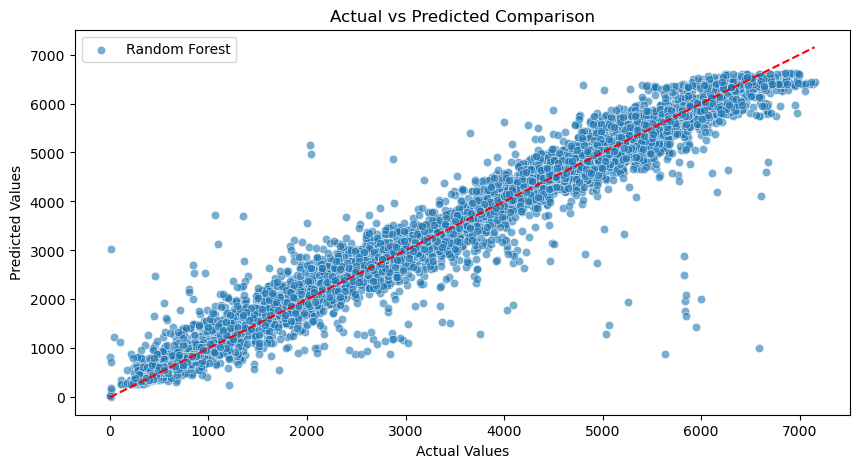

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
#sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()


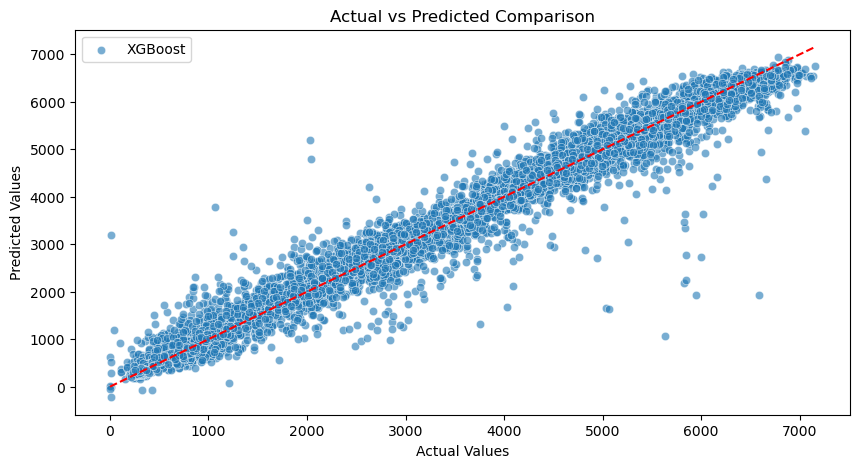

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
#sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()


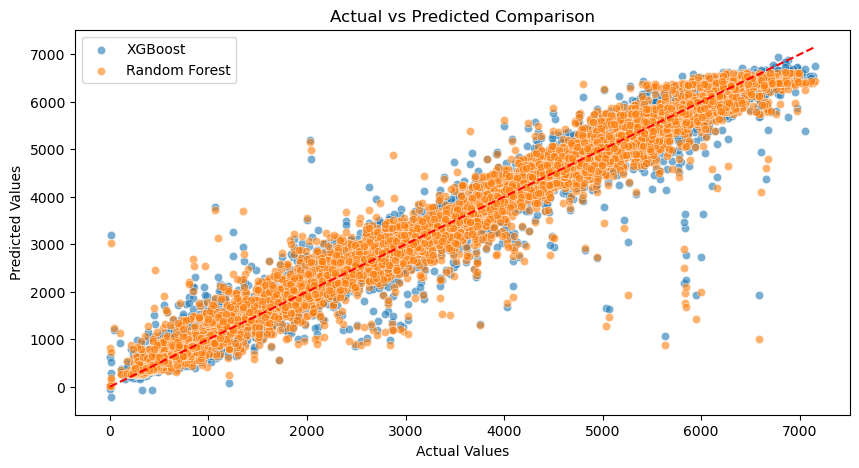

In [567]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()


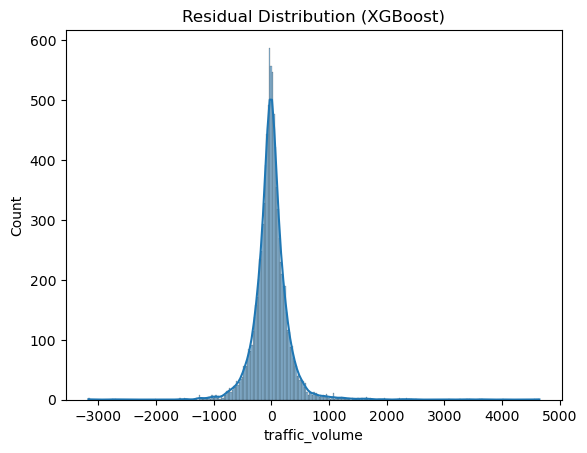

In [569]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (XGBoost)")
plt.show()


### Feature Importance Analysis

#### Random Forest

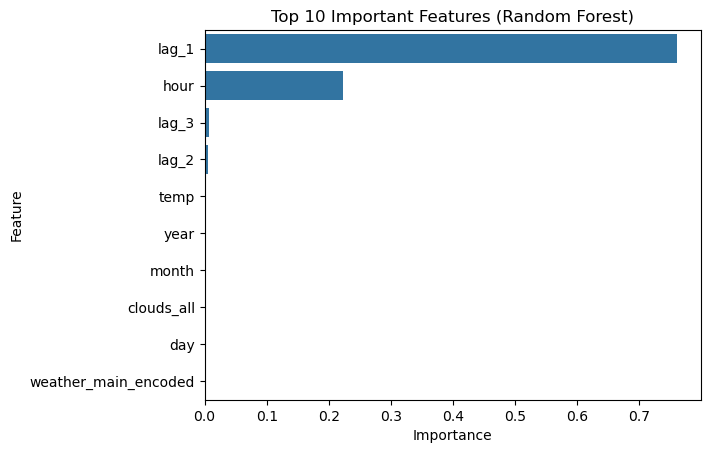

In [573]:
importances = rf_model.feature_importances_
features = X_train.columns
rf_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance.sort_values('Importance', ascending=False, inplace=True)

sns.barplot(data=rf_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()


#### XGB Regressor

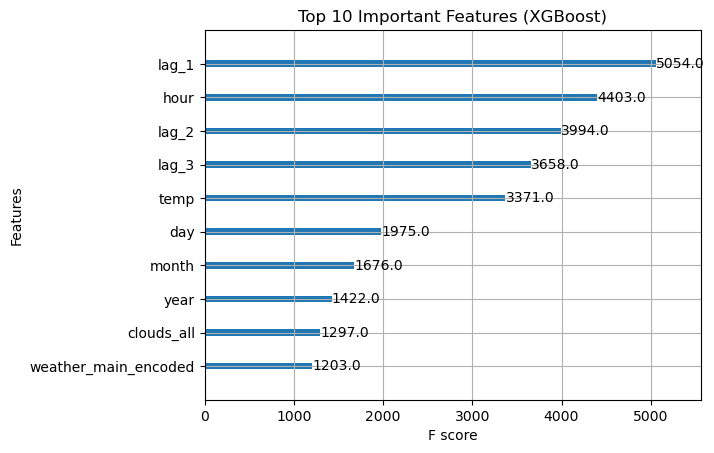

In [576]:
import xgboost as xgb

importances = rf_model.feature_importances_
features = X_train.columns
rf_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance.sort_values('Importance', ascending=False, inplace=True)
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Important Features (XGBoost)')
plt.show()


## Hyperparameter Tuning (Optimization)

In [579]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

grid = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    cv=3,
    scoring='r2',
    n_iter=10,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1333, in fit
    params = self.get_xgb_params()
             ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1086, in get_xgb_params
    params: Dict[str, Any] = self.get_params()
                             ^^^^^^^^^^^^^^^^^
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1069, in get_params
    params.update(cp.__class__.get_params(cp, deep))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1060, in get_params
    params = super().get_params(deep)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ktomj\anaconda3\Lib\site-packages\sklearn\base.py", line 244, in get_params
    value = getattr(self, key)
            ^^^^^^^^^^^^^^^^^^
AttributeError: 'XGBModel' object has no attribute 'device'


In [588]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())


Cross-validated R²: 0.966621193033121


In [590]:
!pip install shap
!pip install --upgrade shap


In [ ]:
pip install xgboost==1.7.6


In [ ]:
!pip install --upgrade shap


In [ ]:
import xgboost, shap
print("xgboost:", xgboost.__version__)
print("shap:", shap.__version__)




In [ ]:
!pip install xgboost==1.7.6


In [ ]:
import xgboost, shap
print("xgboost:", xgboost.__version__)
print("shap:", shap.__version__)